### EXPLORARY DATA ANALYSIS

**Import libraries**

In [147]:
#Basic Libraries
import numpy as np
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

sb.set() # set the default Seaborn style for graphics

**Import the CLEANED CSV file**

In [148]:
df = pd.read_csv("CLEANED.csv", index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3215 entries, 0 to 3214
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       3215 non-null   object 
 1   Address    3215 non-null   object 
 2   Location   3215 non-null   object 
 3   MinPrice   3215 non-null   int64  
 4   MaxPrice   3215 non-null   int64  
 5   Currency   3215 non-null   object 
 6   Cuisine    3215 non-null   object 
 7   Award      3215 non-null   object 
 8   MeanPrice  3215 non-null   float64
 9   USDPrice   3215 non-null   float64
 10  Country    3215 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 301.4+ KB


**PREVIEW PART OF DATASET**

In [149]:
df.head(5)

,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Award,MeanPrice,USDPrice,Country
0,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany",Wolfsburg,225,225,EUR,Creative,3 MICHELIN Stars,225.0,249.77250,Germany
1,The Table Kevin Fehling,"Shanghaiallee 15, Hamburg, 20457, Germany",Hamburg,230,230,EUR,Creative,3 MICHELIN Stars,230.0,255.32300,Germany
2,Restaurant Überfahrt Christian Jürgens,"Überfahrtstraße 10, Rottach-Egern, 83700, Germany",Rottach-Egern,259,319,EUR,Creative,3 MICHELIN Stars,289.0,320.81890,Germany
3,Victor's Fine Dining by christian bau,"Schlossstraße 27, Perl, 66706, Germany",Perl,205,295,EUR,Creative,3 MICHELIN Stars,250.0,277.52500,Germany
4,Rutz,"Chausseestraße 8, Berlin, 10115, Germany",Berlin,198,245,EUR,Creative,3 MICHELIN Stars,221.5,245.88715,Germany


Dataset, df, contains 11 columns contains values for Name, Address, Location, MinPrice, MaxPrice, Currency, Cuisine, Award, MeanPrice, USDPrice and Country

- In this notebook, we will be mainly using Cuisine, Country, USDPrice and Awards for data visualization

**COUNTRY**

- Uni-variate analysis of Country

- List of Countries and a count of countries

In [150]:
country = df.Country.unique()
country_count = df.Country.nunique()

print(country, country_count)

[' Germany' ' United Kingdom' ' Austria' ' China Mainland' ' Macau'
 ' Hong Kong' ' Spain' ' Japan' ' South Korea' ' Italy' ' United States'
 ' Sweden' ' Norway' ' Denmark' ' Singapore' ' Taipei & Taichung'
 ' Netherlands' ' Switzerland' ' France' ' Belgium' ' Ireland' ' Thailand'
 ' Portugal' ' Greece' ' Slovenia' ' Luxembourg' ' Brazil' ' Malta'
 ' Andorra' ' San Marino' ' Czech Republic' ' Iceland' ' Finland'
 ' Croatia' ' Hungary' ' Poland'] 36


**There are 36 Countries**

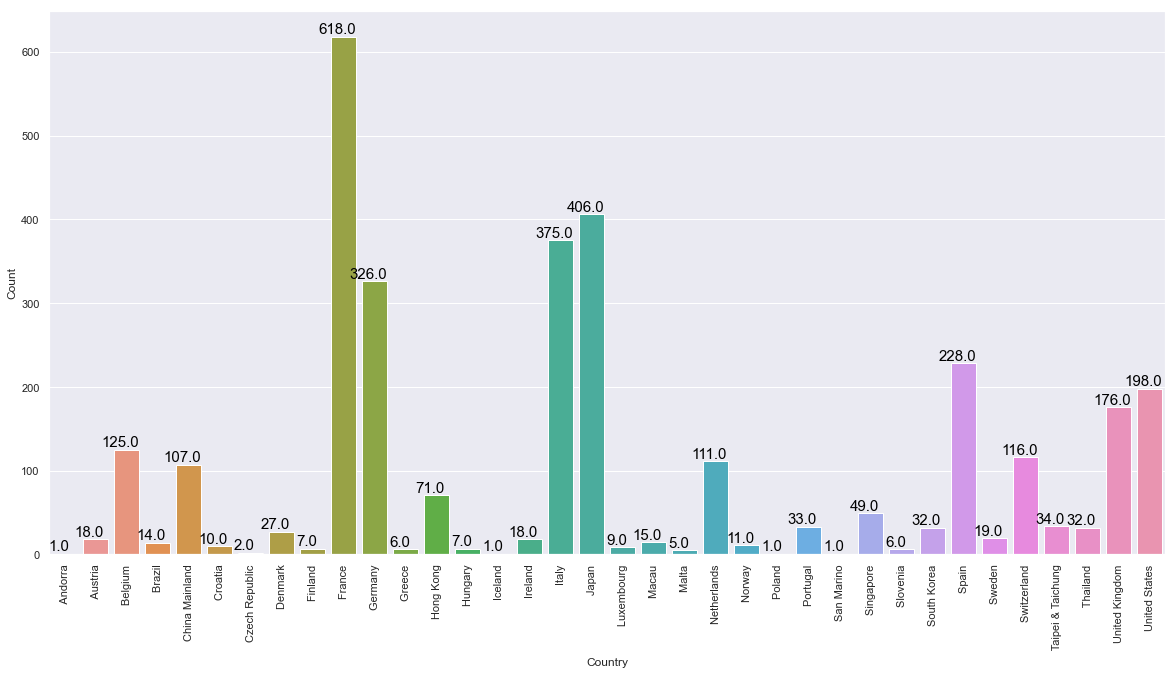

In [155]:
country = df.groupby(['Country']).size().reset_index(name='Count')
country

fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)
ax = sb.barplot(x=country['Country'], y=country['Count'],  ax=ax)

for p in ax.patches:
    
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+.2, p.get_height()), ha='center', va='bottom', color='black', size=15)

**ANALYSIS**

<br>

- There are a total of 36 unique countries that have Michelin star restaurants. 
- The country with the most Michelin Star resturant is France with 618 restaurants, taking up 19.22%.
- The second country with the most Michelin Star resturants is Japan with 406 restaurants, taking up 12.63 %
- The third country with the most Michelin Star resturants is Italy with 375 restaurants, taking up 11.66%
- In the dataset of countries with Michelin Star resturant, the countries with the least number of Michelin Star restaurants are Andorra, Iceland, Poland and San Marrino with only 1 resturant.


**CUISINES**

- Uni-variate analysis of cuisines

<br>

- List of unique cuisines and count

In [156]:
cs = df.Cuisine.unique()
cs_count = df.Cuisine.nunique()

print(cs, cs_count)

['Creative' 'French' 'Modern' 'British' 'Chinese' 'Vegetarian' 'Cantonese'
 'Italian' 'Sushi' 'Japanese' 'Korean' 'Alpine' 'Innovative' 'Seafood'
 'Californian' 'Asian' 'European' 'Contemporary' 'American'
 'Country cooking' 'Mediterranean' 'Classic' 'International' 'Beijing '
 'Sichuan' 'Thai' 'Castilian' 'Shojin' 'Tempura' 'Spanish' 'Sicilian'
 'Regional' 'Indian' 'Mexican' 'Scandinavian' 'Seasonal' 'Traditional'
 'Market' 'Russian' 'Israeli' 'Vegan' 'African' 'Fusion' 'Comtemporary'
 'Irish' 'Scottish' 'Steakhouse' 'Teppanyaki' 'Yakitori'
 'Cantonese Roast Meats' 'Latin American' 'Noodles and Congee'
 'Street Food' 'Portuguese' 'Basque' 'Galician' 'Catalan' 'Andalusian'
 'Colombian' 'Ramen' 'Izakaya' 'Beef Specialities' 'Soba' 'Sukiyaki'
 'Unagi' 'Fugu / Pufferfish' 'Oden' 'Crab' 'Tuscan' 'Romagna' 'Campanian'
 'Piedmontese' 'Sardinian' 'Ligurian' 'Emilian' 'Chao Zhou'
 'Italian, Italian' 'Beef' 'Californain' 'Moroccan' 'Dim Sum' 'Swedish'
 'Finnish' 'Danish' 'Hungarian' 'Barbecue' 

**There are 98 Cuisines**

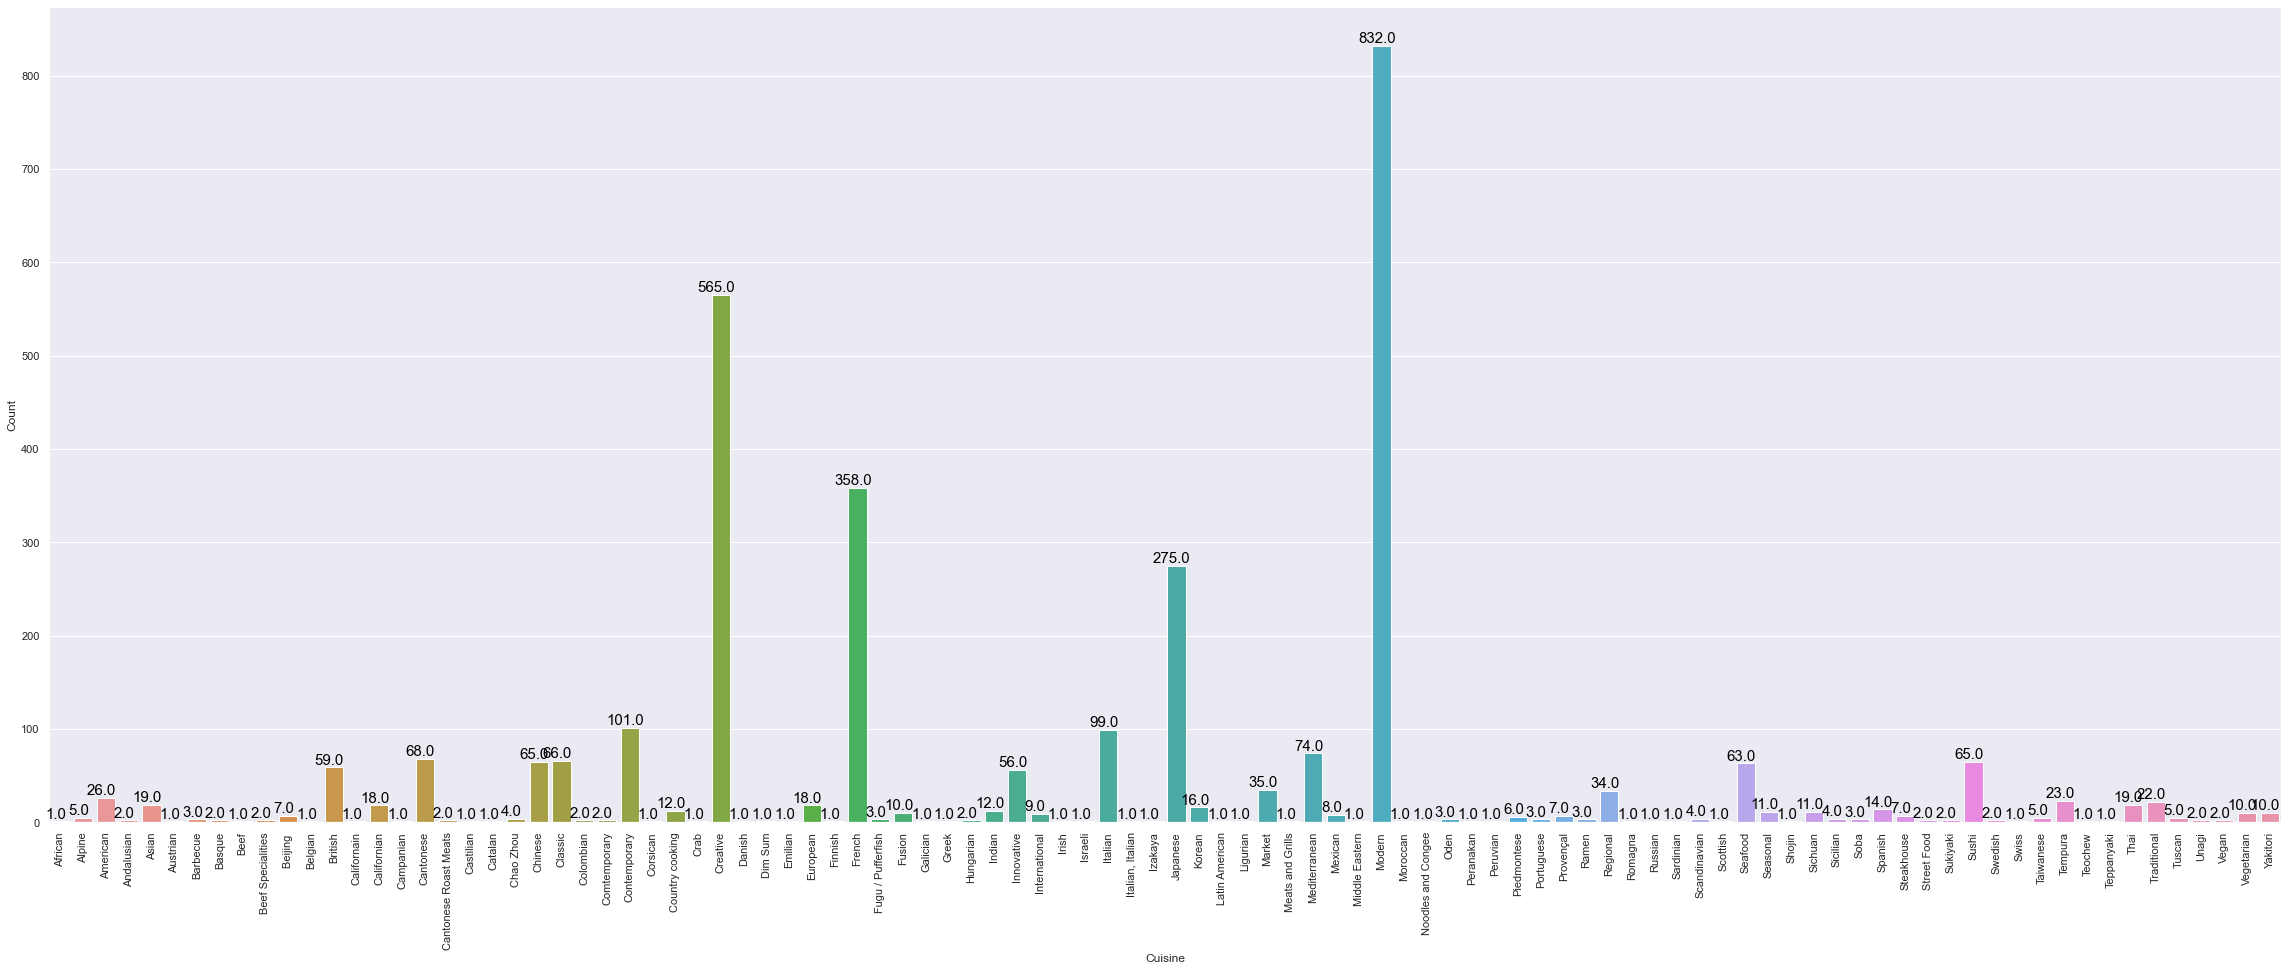

In [158]:
cuisine = df.groupby(['Cuisine']).size().reset_index(name='Count')


fig, ax = plt.subplots(figsize=(40,15))
plt.xticks(rotation=90)
ax = sb.barplot(x=cuisine['Cuisine'], y=cuisine['Count'], ax=ax)
for p in ax.patches:
    
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+.2, p.get_height()), ha='center', va='bottom', color='black', size=15)

**ANALYSIS**
<br>

- There is a total of 98 unique cuisines. 

- The most popular cuisine that bags Michelin Stars is Modern with 832 resturants, taking up 25.87%
- The second most popular cuisine is Creative with 565 resturants, taking up 17.57%
- The third most popular cuisine is French with 358 resturants, taking up 11.14%

- There are many unique cuisines that only has one resturant specialising in it, for example: African, Austrinan, Beef, Belgian, Castilian, Catalan, Crab etc.


**Michelin Stars**

<br>

- Uni-variate analysis of Michelin Stars award

- List of one star, two stars, and three stars resturants


In [159]:
award = df['Award']

three_stars = 0
two_stars = 0
one_star = 0

for x in award:
    if x == '3 MICHELIN Stars':
        three_stars += 1
    
    elif x == '2 MICHELIN Stars':
        two_stars += 1
    
    else:
        one_star += 1
        
print("Total: " +str(three_stars+two_stars+one_star) + "\n")
print("Total 3 Michelin Stars: " + str(three_stars))
print("Total 2 Michelin Stars: " + str(two_stars))
print("Total 1 Michelin Stars: " + str(one_star))

three_stars_percent = three_stars  / 3215 * 100
three_stars_percent = "{:.2f}".format(three_stars_percent)
two_stars_percent = two_stars / 3215 * 100
two_stars_percent = "{:.2f}".format(two_stars_percent)
one_star_percent = one_star / 3215 * 100
one_star_percent = "{:.2f}".format(one_star_percent)

print("Percentage of 3 Michelin Stars: " +  three_stars_percent + "%" )
print("Percentage of 2 Michelin Stars: " +  two_stars_percent + "%" )
print("Percentage of 1 Michelin Star: " +  one_star_percent + "%" )

Total: 3215

Total 3 Michelin Stars: 134
Total 2 Michelin Stars: 473
Total 1 Michelin Stars: 2608
Percentage of 3 Michelin Stars: 4.17%
Percentage of 2 Michelin Stars: 14.71%
Percentage of 1 Michelin Star: 81.12%


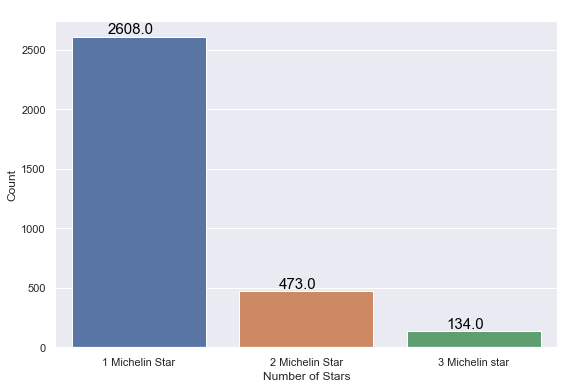

In [165]:
star = pd.DataFrame({'Number of Stars':['1 Michelin Star', '2 Michelin Star', '3 Michelin star'], 'Count':[one_star, two_stars, three_stars]})
# >>> ax = star.plot.bar(x='Number of Stars', y='val', rot=0)

fig, ax = plt.subplots(figsize=(9,6))
plt.xticks(rotation=0)
ax = sb.barplot(x=star['Number of Stars'], y=star['Count'], ax=ax)

for p in ax.patches:
    
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='bottom', color='black', size=15)

**Analysis**

- There are a total of 3215 Michelin star resturants
- There are only 134 three Michelin star resturants
- There are 473 two Michelin star resturants
- There are 2608 one Michelin star resturants

- Percentage of 3 Michelin Stars: 4.17%
- Percentage of 2 Michelin Stars: 14.71%
- Percentage of 1 Michelin Star: 81.12%

**MEAN PRICE IN USD**
<br>

- Uni-variate analysis of mean price in USD


In [74]:
price = df['USDPrice']

price.describe()

count    3215.000000
mean      143.782738
std        70.731138
min         7.386878
25%        95.842246
50%       126.880812
75%       169.290250
max      1016.076644
Name: USDPrice, dtype: float64

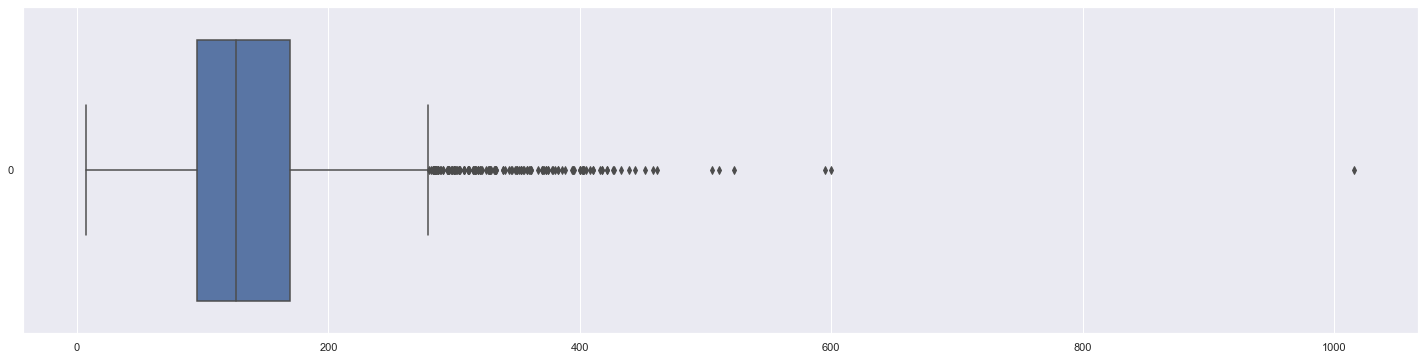

In [79]:
plt.figure(figsize=(25,6))
sb.boxplot(data=price, orient="h")
plt.show()

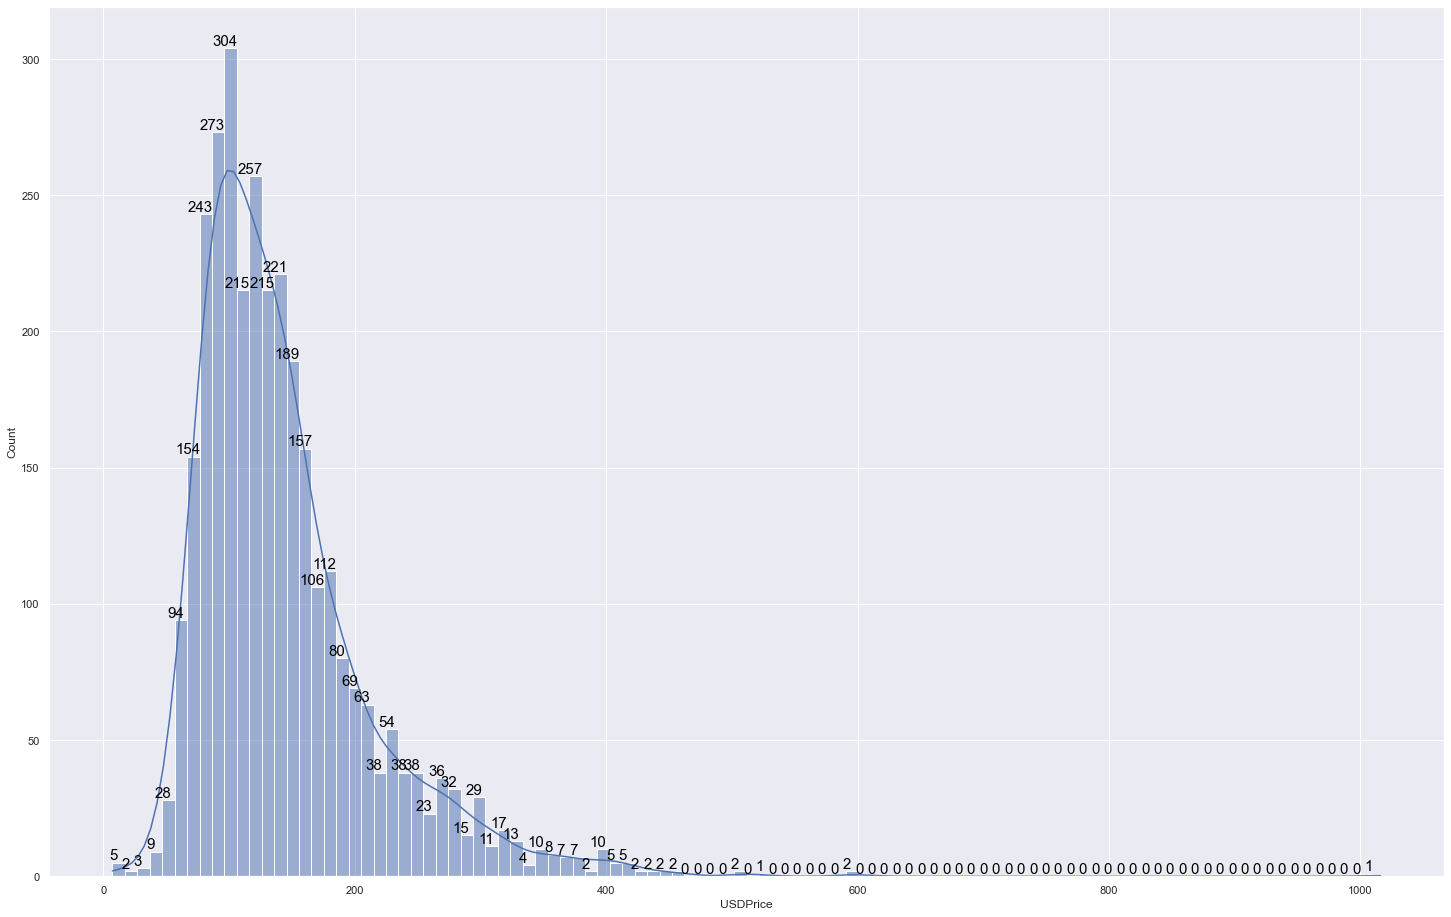

In [168]:
plt.figure(figsize=(25,16))
ax =sb.histplot(data = price, kde=True)
for p in ax.patches:
    
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+.5, p.get_height()), ha='center', va='bottom', color='black', size=15)

<AxesSubplot:>

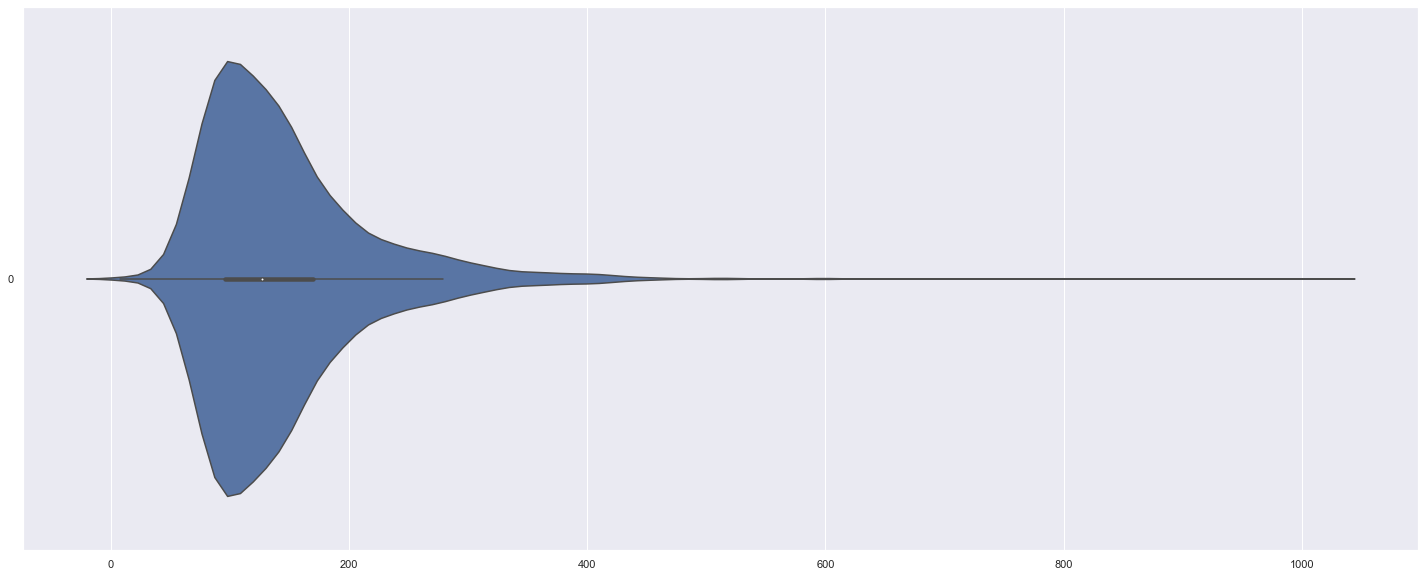

In [97]:
fig, ax = plt.subplots(figsize=(25,10))
sb.violinplot(data=price, orient="h", ax=ax)

**ANALYSIS**
<br>

- The mean price of dining at a Michelin Star resturant is USD$143.78.

- The cheapest price of dining at a Michelin Star resturant is USD$7.39.

- The most expansive meal at a Michelin Star resturant is USD$1016.08.

- There is a standard deviation of USD$70.73.

**COUNTRY AND MICHELIN STARS**
<br>

- Bi-variate analysis of country and number of michelin stars

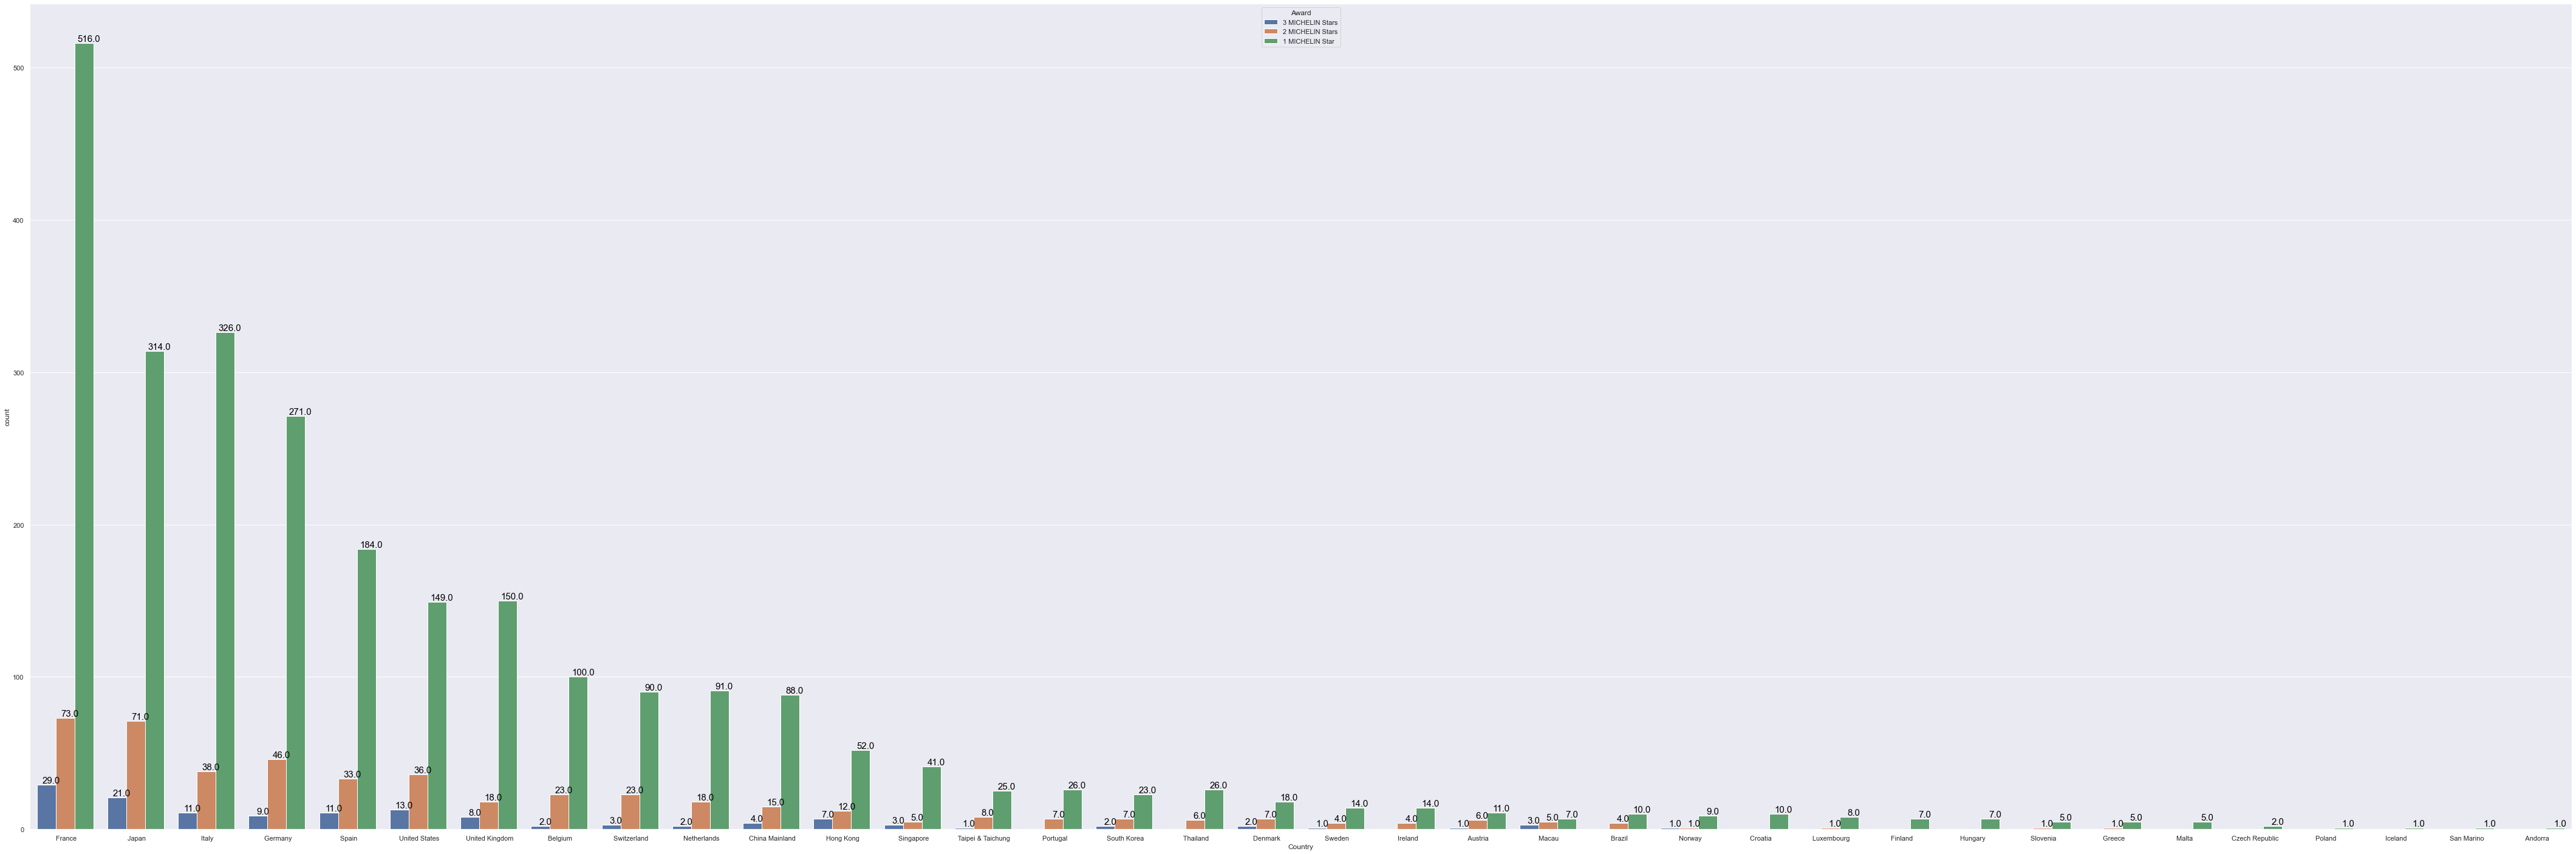

In [169]:
cadf = df[['Country', 'Award']]

plt.figure(figsize=(75,25))
plt.xticks(rotation=0)
ax= sb.countplot(x ="Country",hue="Award", data= cadf, order=cadf['Country'].value_counts().index)

for p in ax.patches:
    
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+.2, p.get_height()), ha='center', va='bottom', color='black', size=15)


**ANALYSIS**
<br>
The country with the most 3 michelin star resturant is: France with 29 followed by Japan with 21 and Italy with 11 \
The country with the most 2 michelin star resturant is: France with 73 followed by Japan with 71 and Italy with 38 \
The country with the most 1 michelin star resturant is: France with 516 followed by Italy with 326 and Japan with 314

<br>

**CUISINE AND MICHELIN STARS**
<br>

- Bi-variate analysis of cuisine and number of michelin stars.

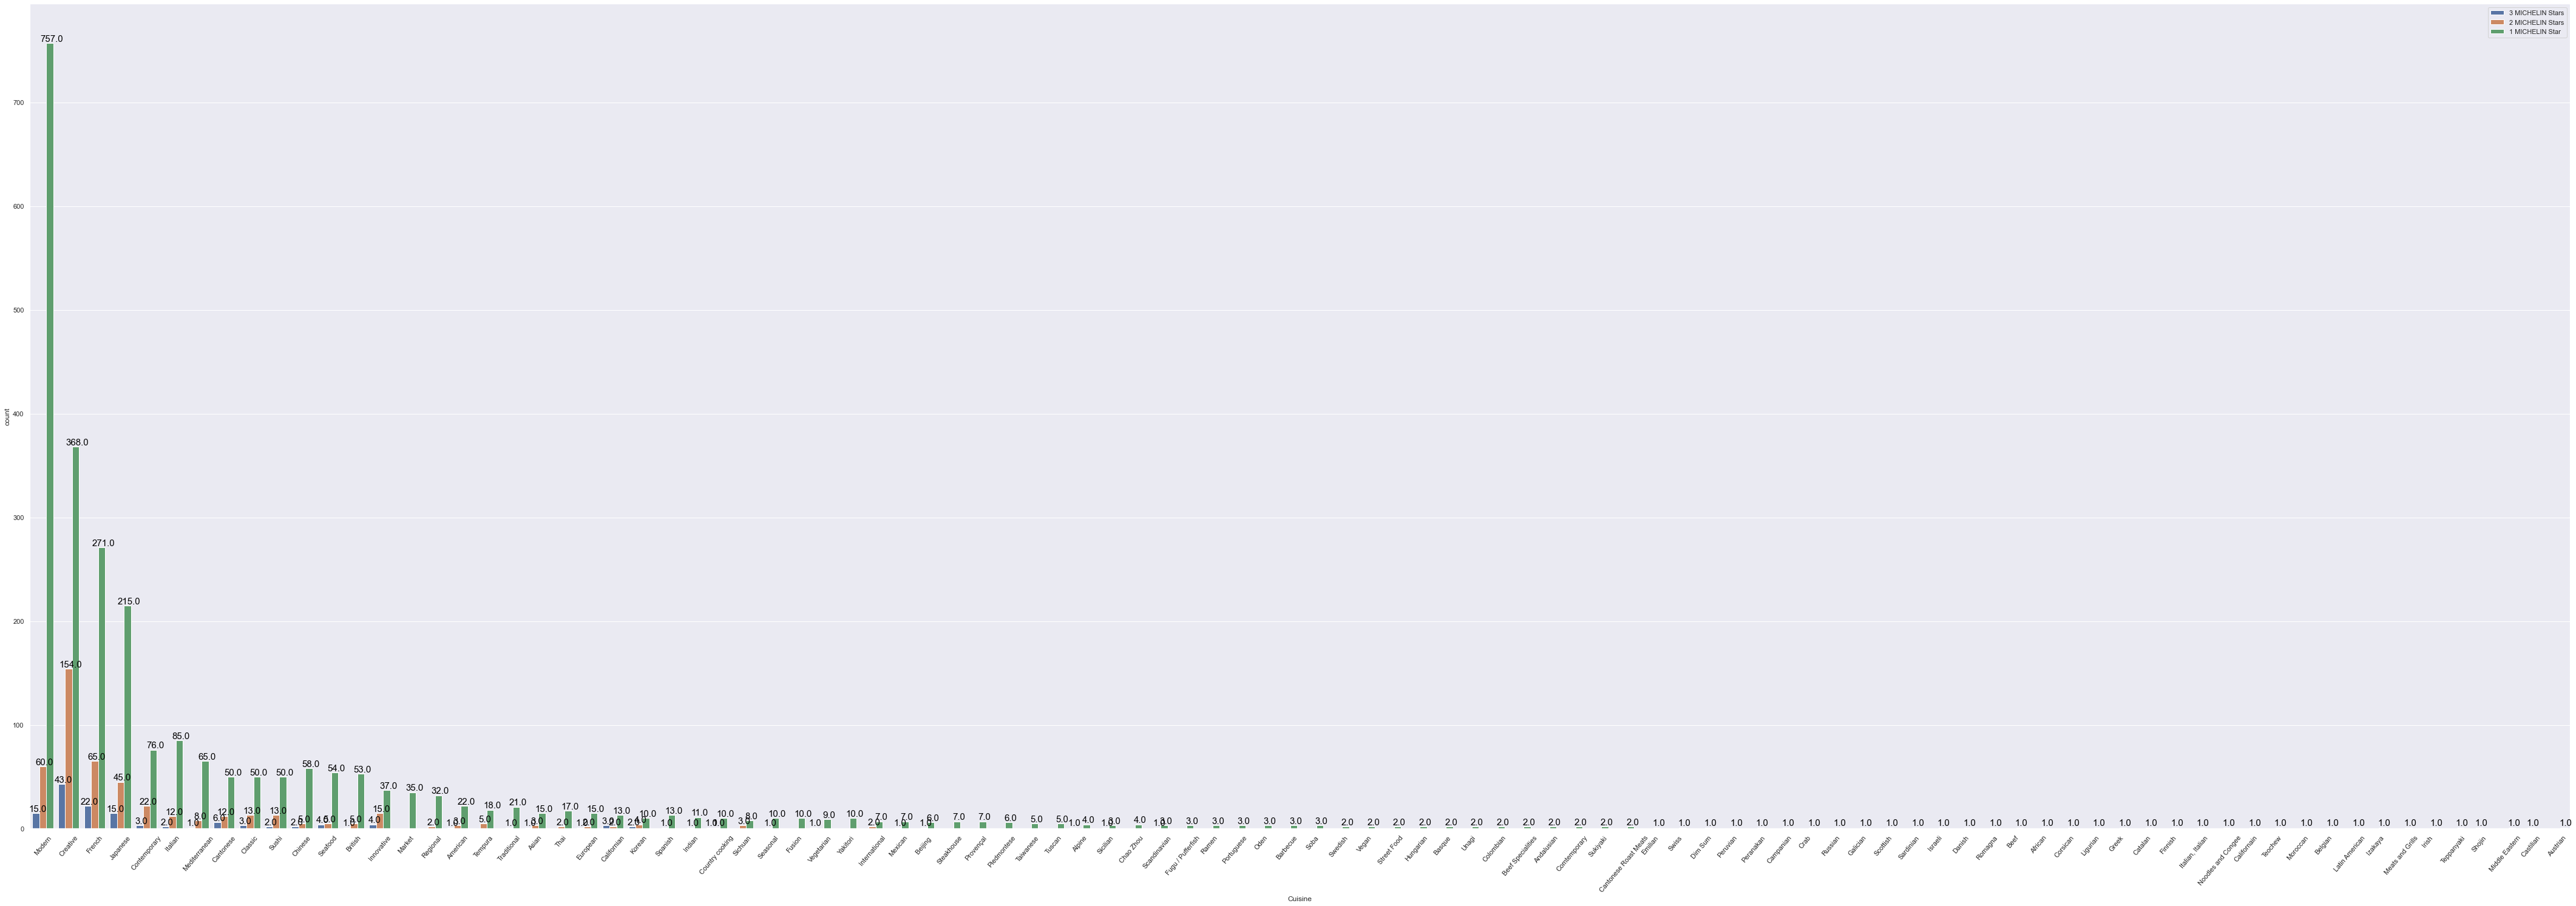

In [142]:
cdf = df[['Cuisine', 'Award']]


plt.figure(figsize=(75,25))
plt.xticks(rotation=50)

ax= sb.countplot(x ="Cuisine",hue="Award", data= cdf, order=cdf['Cuisine'].value_counts().index)
plt.legend(loc='upper right')
for p in ax.patches:
    
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+.2, p.get_height()), ha='center', va='bottom', color='black', size=15)



**ANALYSIS**
<br>
The cuisine with the most 3 michelin stars is: Creative with 43, followed by French with 22, and a tie between Modern and Japanese with 15 \
The cuisine with the most 2 michelin stars are: Creative with 154, followed by French with 65 and Modern with 60 \
The cuisine with the most 1 michelin star are: Modern with 757, followed by Creative with 368 and French with 271

**PRICE AND MICHELIN STAR**
<br>

- Bi-variate anaylsis of mean price in USD and number of michelin stars


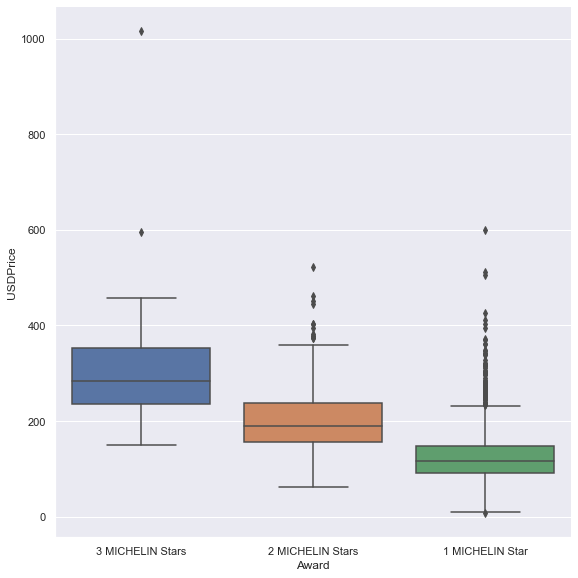

In [146]:
pdf = df[['USDPrice', 'Award']]


sb.catplot(x="Award", y="USDPrice", kind = "box", data=pdf, height=8)

In [172]:
pdf.groupby(['Award']).describe()

USDPrice                                                  \
                    count        mean         std         min         25%   
Award                                                                       
1 MICHELIN Star    2608.0  125.304226   51.349551    7.386878   91.583250   
2 MICHELIN Stars    473.0  201.586290   67.354356   62.120006  155.414000   
3 MICHELIN Stars    134.0  299.386315  100.694832  150.375227  236.051415   

                                                       
                         50%         75%          max  
Award                                                  
1 MICHELIN Star   116.005450  147.689270   600.000000  
2 MICHELIN Stars  189.000000  237.561400   522.371906  
3 MICHELIN Stars  284.837435  353.142709  1016.076644

**ANALYSIS**
<br>

- There are a total of 134 three star michelin resturants, the highest price is 1016.08 USD, while the cheapest is 150.36 USD. The mean price of dining at a three michelin star resturant is 299.38 USD.

<br>

- There are a total of 473 two star michelin resturants, the highest price is 522.37 USD, while the cheapest is at 62.12 USD. The mean price of dining at a two michelin star resturant is 201.59 USD.

<br>

- There are a total of 2608 one michelin star resturants, the highest priced at 600.00USD, while the cheapest is at 7.38USD. The mean price of dining at a one michelin star resturant is 125.30USD.

**CONCLUSION**
<br>

- From our uni-variate analysis on countries, cuisines, there is a higher chance of getting a michelin star if the resturant is in France, focusing on Modern cuisines. The prices should be set around USD143.78.

- From our bi-variate analysis on countries with award, cuisine with award and price with award, we concluded that generally stationing the resturant in France will have a higher chance of getting a michelin star.

- Focusing on modern cuisines will haver chance of getting a michelin star, however, switching to a Creative cuisine will warrant higher chances of getting two and three michelin stars.

- The price of dining generally increases as the number of michelin star increases